# Final Project - Kaggle Competition
Author: Christopher DiMattia

## Introduction - Clustering

The goal of this project is to compete in a Kaggle competition to compare the ML techniques I learned in this course to those of people who actively participate in ML competitions.  This notebook is to test unsupervised learning or clustering specifically and see how it compares to supervised learning.  It is assumed this model will perform far worse given that supervised learning adds an incredible amount of useful data

In [2]:
#import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#read in CSV and print to ensure it works
df = pd.read_csv("test.csv")
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [4]:
#perform pre-processing on data to remove names, split cabin into seperate columns and split passenger ids
def preProcess_noID(df):
    df_split_cabin =df["Cabin"].str.split('/',expand=True)
    df_split_cabin = df_split_cabin.rename(columns={0: 'deck', 1: 'num', 2: 'side'})
    df = df.join(df_split_cabin)
    df =df.drop(["Cabin"],axis=1).drop(["PassengerId"],axis=1).drop(["Name"],axis=1)
    return df

In [5]:
df_processed = preProcess_noID(df)
df_processed

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,deck,num,side
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,G,3,S
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,F,4,S
2,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,C,0,S
3,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,C,1,S
4,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,F,5,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,Earth,True,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,G,1496,S
4273,Earth,False,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,NaN,NaN,NaN
4274,Mars,True,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,D,296,P
4275,Europa,False,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,D,297,P


### NaN Values

Based on the previous models it is best to replace the nan values instead of removing them.

In [6]:
#replace nan values with mean and mode
col_numeric = df_processed.select_dtypes(include=['number']).columns
col_text = df_processed.select_dtypes(include=['object']).columns

for column in col_numeric:
    df_processed[column] = df_processed[column].fillna(df_processed[column].mean())

for column in col_text:
    df_processed[column] = df_processed[column].fillna(df_processed[column].mode().iloc[0])
df_withNans = df_processed

In [7]:
df_withNans

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,deck,num,side
0,Earth,True,TRAPPIST-1e,27.000000,False,0.0,0.0,0.0,0.0,0.0,G,3,S
1,Earth,False,TRAPPIST-1e,19.000000,False,0.0,9.0,0.0,2823.0,0.0,F,4,S
2,Europa,True,55 Cancri e,31.000000,False,0.0,0.0,0.0,0.0,0.0,C,0,S
3,Europa,False,TRAPPIST-1e,38.000000,False,0.0,6652.0,0.0,181.0,585.0,C,1,S
4,Earth,False,TRAPPIST-1e,20.000000,False,10.0,0.0,635.0,0.0,0.0,F,5,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,Earth,True,TRAPPIST-1e,34.000000,False,0.0,0.0,0.0,0.0,0.0,G,1496,S
4273,Earth,False,TRAPPIST-1e,42.000000,False,0.0,847.0,17.0,10.0,144.0,F,4,S
4274,Mars,True,55 Cancri e,28.658146,False,0.0,0.0,0.0,0.0,0.0,D,296,P
4275,Europa,False,TRAPPIST-1e,28.658146,False,0.0,2680.0,0.0,0.0,523.0,D,297,P


In [8]:
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

def one_hot_encoding(df):
    columns = ['HomePlanet','CryoSleep','Destination','VIP','deck','side']
    enc = OneHotEncoder()
    encoded_columns = enc.fit_transform(df[columns])
    # Create a new dataframe with the encoded columns and merge it with the original dataframe
    encoded_df = pd.DataFrame(encoded_columns.toarray(), columns=enc.get_feature_names_out (columns))
    df = pd.concat([df.drop(columns, axis=1), encoded_df], axis=1)
    return df

def label_encoder(df):
    le = preprocessing.LabelEncoder()
    y_enc = le.fit(df["Transported"]).transform(df["Transported"])
    return y_enc

In [9]:
#encode X with Nan values replaced by mean and mode
X_nans_encoded = one_hot_encoding(df_withNans)


In [10]:
X_nans_encoded

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,num,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,...,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T,side_P,side_S
0,27.000000,0.0,0.0,0.0,0.0,0.0,3,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,19.000000,0.0,9.0,0.0,2823.0,0.0,4,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,31.000000,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,38.000000,0.0,6652.0,0.0,181.0,585.0,1,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,20.000000,10.0,0.0,635.0,0.0,0.0,5,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,34.000000,0.0,0.0,0.0,0.0,0.0,1496,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4273,42.000000,0.0,847.0,17.0,10.0,144.0,4,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4274,28.658146,0.0,0.0,0.0,0.0,0.0,296,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4275,28.658146,0.0,2680.0,0.0,0.0,523.0,297,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [11]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

#cluserting function using KMeans
def cluster_fn_Kmeans(X, n_clusters, n_components=0):
    if n_components > 0:
        X = PCA(n_components=n_components).fit_transform(X)
    
    kmeans = KMeans(n_clusters=n_clusters,random_state=0).fit(X)
    return silhouette_score(X, kmeans.labels_) 


#clustering using GMM
from sklearn.mixture import GaussianMixture
def cluster_fn_GMM(X, n_clusters, n_components=0):
    if n_components > 0:
        X = PCA(n_components=n_components).fit_transform(X)
    
    GM = GaussianMixture(n_components=n_clusters,random_state=0).fit(X)
    return silhouette_score(X, GM.labels_) 



Ideally we will have a fairly high score with just 2 clusters.  If we have more we will need to justify why there are seperate groups and try to combine them

In [12]:
#finding the  silhouette scores for different clusters
clusters = [2,3,4,5,6]

df_21 = pd.DataFrame(index=clusters, columns=["Silhouette Score"])
df_21.index.name = 'Cluster'

#print scores for comparision
for cluster in clusters:
    print("cluster " + str(cluster) + ": silhouette score: " + str(cluster_fn_Kmeans(X_nans_encoded,cluster)))
    df_21.at[cluster,'Cluster'] = cluster
    df_21.at[cluster,'Silhouette Score'] = cluster_fn_Kmeans(X_nans_encoded,cluster)

df_21 = df_21.drop(["Cluster"],axis=1)

cluster 2: silhouette score: 0.7710158779655254
cluster 3: silhouette score: 0.759267568137242
cluster 4: silhouette score: 0.7521729666905824
cluster 5: silhouette score: 0.6624310229340334
cluster 6: silhouette score: 0.6694399670516061


In [13]:
#try the same as above but with different PCA components
clusters = [2,3,4,5,6]
components = [2,3,4,5,6]

df_22 = pd.DataFrame(index=clusters, columns=components)
df_22.index.name = 'Cluster'
df_22.columns.name = "Components"

#print scores for comparision
for cluster in clusters:
    for component in components:
        print("cluster " + str(cluster) + " components: " + str(component)  + ": silhouette score: "+ str(cluster_fn_Kmeans(X_nans_encoded,cluster,component)))
        df_22.at[cluster,component] = cluster_fn_Kmeans(X_nans_encoded,cluster,component)

cluster 2 components: 2: silhouette score: 0.8655103646194955
cluster 2 components: 3: silhouette score: 0.8461635576644212
cluster 2 components: 4: silhouette score: 0.8157643584563764
cluster 2 components: 5: silhouette score: 0.8006090611489092
cluster 2 components: 6: silhouette score: 0.7710560199315777
cluster 3 components: 2: silhouette score: 0.8714146338132216
cluster 3 components: 3: silhouette score: 0.8434316624691125
cluster 3 components: 4: silhouette score: 0.8072239675387904
cluster 3 components: 5: silhouette score: 0.7903920997450036
cluster 3 components: 6: silhouette score: 0.7593125812396038
cluster 4 components: 2: silhouette score: 0.8261573396432635
cluster 4 components: 3: silhouette score: 0.8427944892233858
cluster 4 components: 4: silhouette score: 0.8054968403741457
cluster 4 components: 5: silhouette score: 0.7864808314213365
cluster 4 components: 6: silhouette score: 0.7522226361194689
cluster 5 components: 2: silhouette score: 0.8352215913296276
cluster 

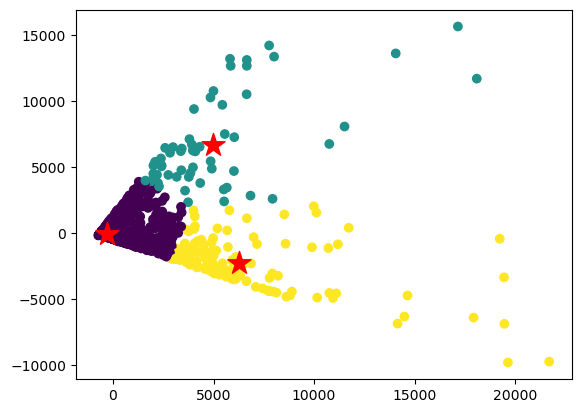

In [14]:
#lets plot to see what the data looks like.  The best model is with 2 components and 3 clusters
X = PCA(n_components=2).fit_transform(X_nans_encoded)
kmeans = KMeans(n_clusters=3)
labels = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s=300, c='red')
plt.show()

The above data doesn't look promising.  If we had to guess the far left corner would either be transported or not, but it isn't obvious were the cutoff point would be.  Trying to use clustering will prove to be difficult for this problem.  That said let's try and run this data and submit it so see what kind of result we get

In [15]:
#read in test data
df_test = pd.read_csv("test.csv")
df_test_processed = preProcess_noID(df_test)

#replace nan values with mean and mode for test set
col_numeric = df_test_processed.select_dtypes(include=['number']).columns
col_text = df_test_processed.select_dtypes(include=['object']).columns

for column in col_numeric:
    df_test_processed[column] = df_test_processed[column].fillna(df_test_processed[column].mean())

for column in col_text:
    df_test_processed[column] = df_test_processed[column].fillna(df_test_processed[column].mode().iloc[0])

df_test_withNans = df_test_processed


X = PCA(n_components=2).fit_transform(X_nans_encoded)
kmeans = KMeans(n_clusters=3).fit(X)
predictions = kmeans.predict(X)
df_pred = pd.DataFrame(predictions)

#encode test set to match model input
df_test_encoded = one_hot_encoding(df_test_withNans)
#make predictions
y_val_predict = df_pred
#refomat into Kaggle format for submission
df_pred = pd.DataFrame(y_val_predict)

merged_df = pd.merge(df_test,df_pred,left_index=True, right_index=True).rename(columns={0: 'Transported'})
merged_df['Transported'] = merged_df["Transported"].replace({1:True,0:False})


result = pd.concat([merged_df['PassengerId'],merged_df['Transported']],axis=1)
result = result.set_index('PassengerId')
result.to_csv('result_' + "clustering_results" + '.csv')

## Comparision to the training data

Let's look at the training data to see if a cluster is identifiable in our training data and if our cluster predictions match up

In [20]:
#read in CSV and print to ensure it works
df_train = pd.read_csv("train.csv")
df_processed_train = preProcess_noID(df_train)

#replace nan values with mean and mode
col_numeric = df_processed_train.select_dtypes(include=['number']).columns
col_text = df_processed_train.select_dtypes(include=['object']).columns

for column in col_numeric:
    df_processed_train[column] = df_processed_train[column].fillna(df_processed_train[column].mean())

for column in col_text:
    df_processed_train[column] = df_processed_train[column].fillna(df_processed_train[column].mode().iloc[0])

df_withNans_train = df_processed_train

In [21]:
#encode X with Nan values replaced by mean and mode
X_nans_encoded_train = one_hot_encoding(df_withNans_train)
y_nans = pd.DataFrame(df_withNans_train["Transported"], columns=["Transported"])
y = label_encoder(y_nans)

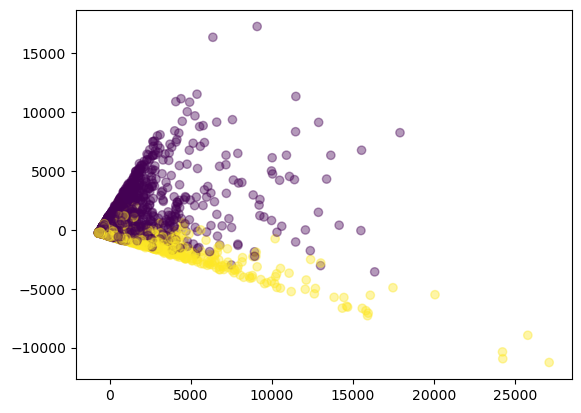

In [31]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


#lets plot to see what the data looks like.  The best model is with 2 components and 3 clusters
X = PCA(n_components=2).fit_transform(X_nans_encoded_train)
kmeans = KMeans(n_clusters=4)
labels = y

plt.scatter(X[:, 0], X[:, 1], c=labels, alpha=0.4)
plt.show()

## Comparision Results

Unsurprisingly our cluster predictions on the testing data do not match our training data true values and intuitively speaking it's easy to see why.  There is no distinct cluster, so in order to properly obtain good results we could have to delineate the data ourselves on the test data based on the above plot without an algorithm and then map the values back onto the test set for accurate predictions.

In summary we could try and draw a line horizontally to seperate the data, but it's not obvious without the true values in the test data.